In [2]:
!pip install music21 pitchtypes

In [6]:
from music21 import converter, note, chord
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from music21 import converter, note, chord

# 加载 MIDI 文件
midi_path = 'HONG04M.mid'
score = converter.parse(midi_path)

# 初始化存储音高变化和velocity的列表
pitch_differences = []
velocities = []

# 获取所有的音符和和弦，保存到列表中
elements = list(score.flat.notes)

# 遍历音符和和弦以计算音高变化和存储velocity
previous_pitch = None  # 初始化前一个音符的音高

for element in elements:
    current_velocity = element.volume.velocity if element.volume.velocity is not None else 64  # 默认velocity

    if isinstance(element, note.Note):
        current_pitch = element.pitch.midi
    elif isinstance(element, chord.Chord):
        # 取和弦中最高音的音高作为和弦的音高
        current_pitch = max(n.pitch.midi for n in element.notes)

    if previous_pitch is not None:  # 若存在前一个音符，则计算音高差异
        pitch_difference = current_pitch - previous_pitch
        pitch_differences.append(pitch_difference)
        velocities.append(current_velocity)

    # 更新前一个音符的音高
    previous_pitch = current_pitch

# 现在 pitch_differences 和 velocities 已准备好用于后续分析或模型训练


In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 将数据转换为 NumPy 数组
X = np.array(pitch_differences).reshape(-1, 1)
y = np.array(velocities)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# 标准化处理
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [47]:
# 创建 MLP 模型

mlp = MLPRegressor(
    hidden_layer_sizes=(5000,),  # 增加神经元数量
    activation='relu',          # 保持 relu 激活函数
    solver='adam',              # 保持 adam 优化器
    alpha=0.0001,               # L2 正则化项
    learning_rate_init=0.001,   # 学习率
    max_iter=1000,              # 增加最大迭代次数
    random_state=42
)
# 训练模型
mlp.fit(X_train_scaled, y_train)


MLPRegressor(hidden_layer_sizes=(5000,), max_iter=1000, random_state=42)

In [48]:
# 在测试集上进行预测
y_pred = mlp.predict(X_test_scaled)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 67.59370186130768
R2 Score: 0.052449623797062306


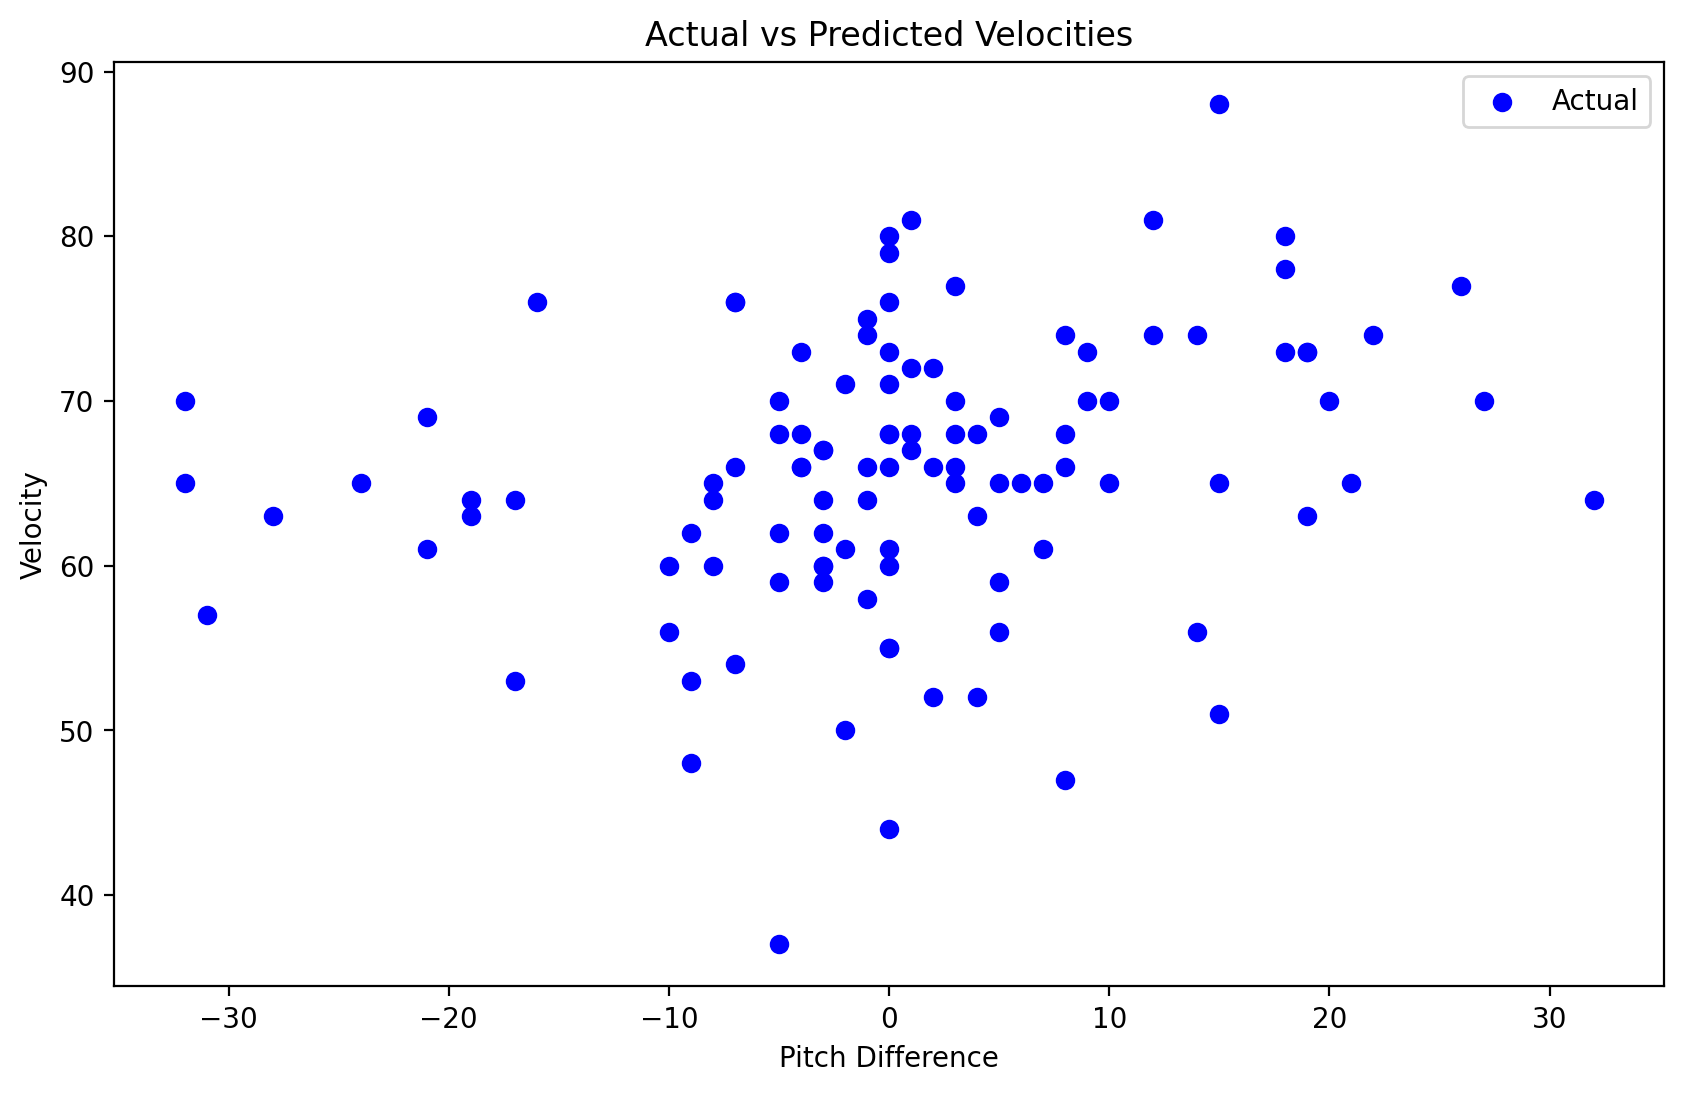

In [50]:
import matplotlib.pyplot as plt

# 绘制实际值与预测值
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
# plt.scatter(X_test, y_pred, color='red', alpha=0.5, label='Predicted')
plt.title('Actual vs Predicted Velocities')
plt.xlabel('Pitch Difference')
plt.ylabel('Velocity')
plt.legend()
plt.show()


Mean Squared Error: 61.80419479389321
R2 Score: 0.12001807389561758


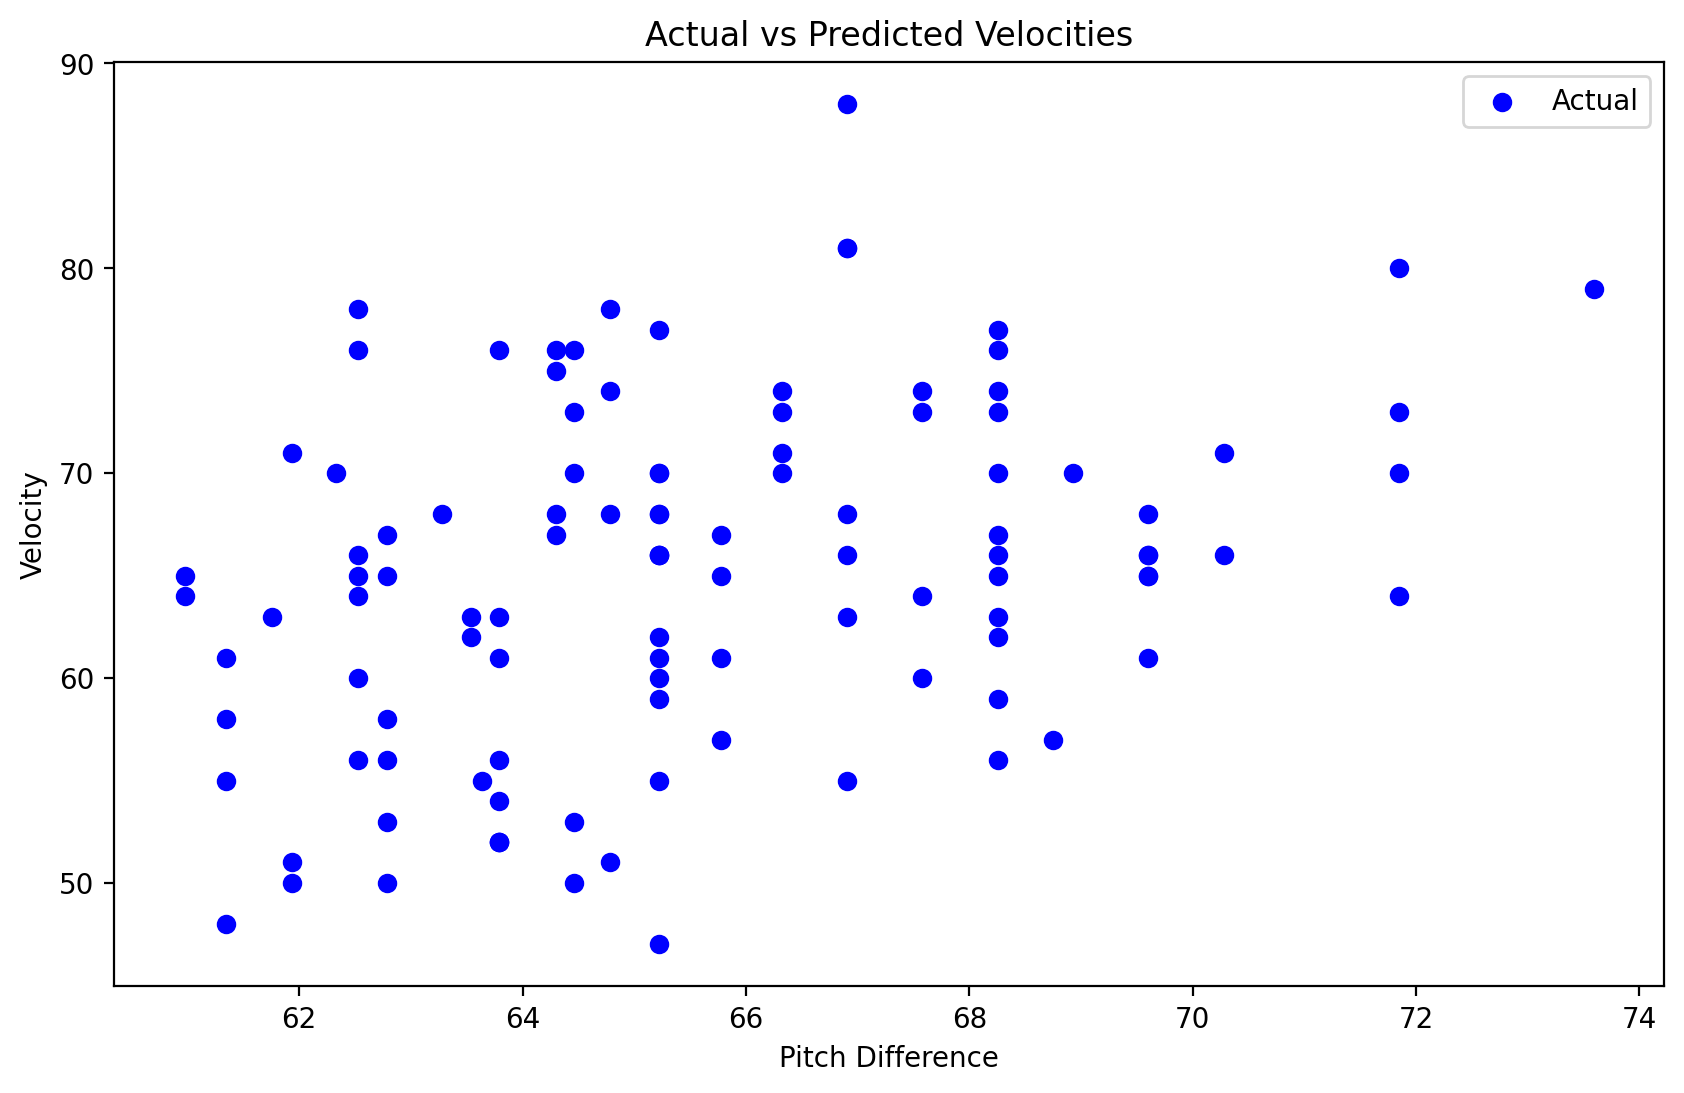

In [265]:
from music21 import converter, note, chord
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from music21 import converter, note, chord

# 加载 MIDI 文件
midi_path = 'HONG04M.mid'
score = converter.parse(midi_path)

# 初始化存储音高变化和velocity的列表
pitch_differences = []
current_pitch_list = []
previous_pitch_list = []
velocities = []
number_list = []
i = 0
# 获取所有的音符和和弦，保存到列表中
elements = list(score.flat.notes)

# 遍历音符和和弦以计算音高变化和存储velocity
previous_pitch = None  # 初始化前一个音符的音高

for element in elements:
    current_velocity = element.volume.velocity if element.volume.velocity is not None else 64  # 默认velocity

    if isinstance(element, note.Note):
        current_pitch = element.pitch.midi
    elif isinstance(element, chord.Chord):
        # 取和弦中最高音的音高作为和弦的音高
        current_pitch = max(n.pitch.midi for n in element.notes)

    if previous_pitch is not None:  # 若存在前一个音符，则计算音高差异
        pitch_difference = current_pitch - previous_pitch
        pitch_differences.append(pitch_difference)
        current_pitch_list.append(current_pitch)
        previous_pitch_list.append(previous_pitch)
        number_list.append(i)
        i = i+1
        velocities.append(current_velocity)

    # 更新前一个音符的音高
    previous_pitch = current_pitch


next_pitch_list = current_pitch_list[1:]
previous_pitch_list = previous_pitch_list[:-1]
current_pitch_list = current_pitch_list[:-1]
number_list = number_list[:-1]
pitch_differences = pitch_differences[:-1]
velocities = velocities[:-1]
# data =  next_pitch_list + current_pitch_list + previous_pitch_list
data = current_pitch_list
# 现在 pitch_differences 和 velocities 已准备好用于后续分析或模型训练

# 将数据转换为 NumPy 数组
X = np.array(data).reshape(-1, 545).T
y = np.array(velocities)

# 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# 标准化处理
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# 创建 MLP 模型

mlp = MLPRegressor(
    hidden_layer_sizes=(128,),  # 增加神经元数量
    activation='relu',          # 保持 relu 激活函数
    solver='sgd',              # 保持 adam 优化器
    alpha=0.001,               # L2 正则化项
    learning_rate_init=0.01,   # 学习率
    max_iter=10000,             # 增加最大迭代次数
    random_state=42
)
# 训练模型
mlp.fit(X_train_scaled, y_train)

# 在测试集上进行预测
y_pred = mlp.predict(X_test_scaled)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


# 绘制实际值与预测值
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, color='blue', label='Actual')
# plt.scatter(X_test, y_pred, color='red', alpha=0.5, label='Predicted')
plt.title('Actual vs Predicted Velocities')
plt.xlabel('Pitch Difference')
plt.ylabel('Velocity')
plt.legend()
plt.show()

In [266]:
from music21 import converter

# 设定MIDI文件的路径
midi_file_path = 'Bach_Prelude_bwv_875_midi_score.mid'
# 加载MIDI文件
score = converter.parse(midi_file_path)

In [269]:
# 假设 y_pred 是你已经生成的预测velocity数组
# 确保 y_pred 的长度至少与 MIDI 文件中的音符数量相等

y_pred = mlp.predict(X_scaled)
notes = score.flat.notes
for i, note in enumerate(notes):
    if i < len(y_pred):
        # 更新音符的velocity
        note.volume.velocity = int(y_pred[i])
    else:
        note.volume.velocity = int(y_pred[i-len(y_pred)])

E:\lib\site-packages\music21\stream\base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


In [271]:
# 设定保存的文件路径
output_midi_path = 'generate_MLP_Pitchchange_Prelude.mid.mid'
# 保存MIDI文件
score.write('midi', fp=output_midi_path)

'generate_MLP_Pitchchange_Prelude.mid.mid'

In [257]:
# 假设 y_pred 是你已经生成的预测velocity数组
# 确保 y_pred 的长度至少与 MIDI 文件中的音符数量相等

notes = score.flat.notes
for i, note in enumerate(notes):
    if i < len(y_pred):
        # 更新音符的velocity
        note.volume.velocity = int(y_pred[i])
# 设定保存的文件路径
output_midi_path = 'generate33.mid'
# 保存MIDI文件
score.write('midi', fp=output_midi_path)

'generate33.mid'

In [258]:
len(notes)

547